Data analysis of swear word data

In [1]:
from collections import Counter

In [2]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd

In [3]:
from noswear.data import dataset

/home/nemo/envs/noswear/lib/python3.6/site-packages/torchaudio/backend/utils.py:54: UserWarning: "sox" backend is being deprecated. The default backend will be changed to "sox_io" backend in 0.8.0 and "sox" backend will be removed in 0.9.0. Please migrate to "sox_io" backend. Please refer to https://github.com/pytorch/audio/issues/903 for the detail.
  '"sox" backend is being deprecated. '


In [4]:
ds_swear = dataset.SwearDataset(base_path='../', providers=dataset.DEFAULT_PROVIDERS)

In [5]:
X_swear, y_swear = ds_swear.load()

In [6]:
words = np.array([n[0] for n in X_swear])
swear_mask = np.array(y_swear)

In [7]:
noswear_words = set(words[~swear_mask])
swear_words = set(words[swear_mask])

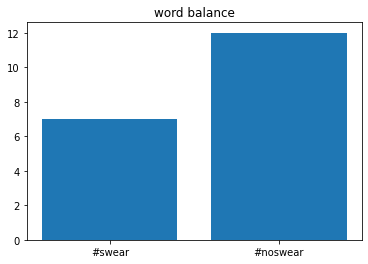

In [8]:
plt.title('word balance')
plt.bar(['#swear', '#noswear'], [len(swear_words), len(noswear_words)]);

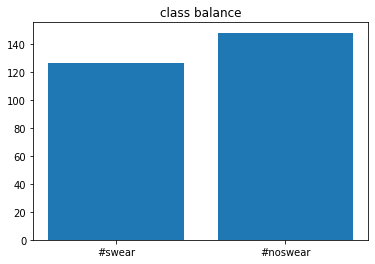

In [9]:
plt.title('class balance')
plt.bar(['#swear', '#noswear'], [swear_mask.sum(), (~swear_mask).sum()]);

### Take a look at the sample counts of words

In [10]:
df = pd.DataFrame(
    list(Counter([n[0] for n in X_swear]).items()), 
    columns=['word', 'count']
)

In [11]:
df.sort_values('count').head(10)

,word,count
3,grunt,3
2,misfit,4
17,fucktard,4
11,SILENCE,4
1,fit,6
8,she,9
18,piss,10
7,he,10
4,person,11
15,asshole,13


### Audio data

In [12]:
from deepspeech.data.data_loader import SpectrogramParser

In [13]:
# As used by DeepSpeech pre-trained model
audio_conf = {
 'sample_rate': 16000,
 'window_size': 0.02,
 'window_stride': 0.01,
 'window': 'hamming',
 'noise_dir': None,
 'noise_prob': 0.4,
 'noise_levels': (0.0, 0.5)
}
parser = SpectrogramParser(audio_conf, normalize=True)

In [14]:
sampler = dataset.SOXSampler(sample_rate=audio_conf['sample_rate'])

In [15]:
ds_audio = dataset.SwearBinaryAudioDataset(X_swear, y_swear, parser, sampler)

In [16]:
X_audio, y_audio = ds_audio.load()

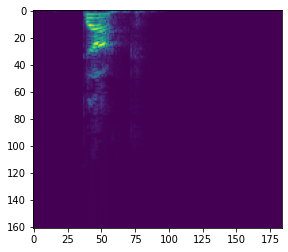

In [17]:
plt.imshow(X_audio[0])

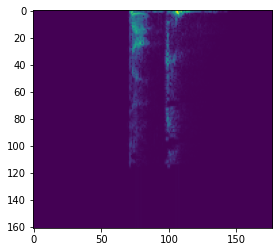

In [18]:
plt.imshow(X_audio[1])